In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [424]:
from typing import Union, List
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# For GP
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import (
    DotProduct,
    WhiteKernel,
    RBF,
    ExpSineSquared,
    Exponentiation,
)

plt.rcParams["font.size"] = 15
plt.rcParams["figure.figsize"] = (14, 6)

<IPython.core.display.Javascript object>

Optima: x=0.9, y=0.81


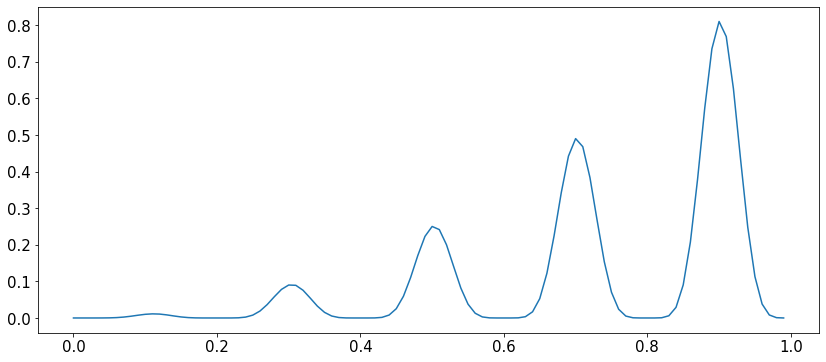

<IPython.core.display.Javascript object>

In [386]:
# objective function
def objective(x: Union[float, np.ndarray], noise_std: float = 0.0):
    noise = np.random.normal(loc=0, scale=noise_std)
    return (x ** 2 * np.sin(5 * np.pi * x) ** 6.0) + noise


# grid-based sample of the domain [0,1]
X = np.arange(start=0, stop=1, step=0.01)
y = objective(X)

print(f"Optima: x={X[np.argmax(y)]}, y={y[np.argmax(y)]}")

plt.plot(X, y)
plt.show()

### Step 1: Sample the domain sparsely

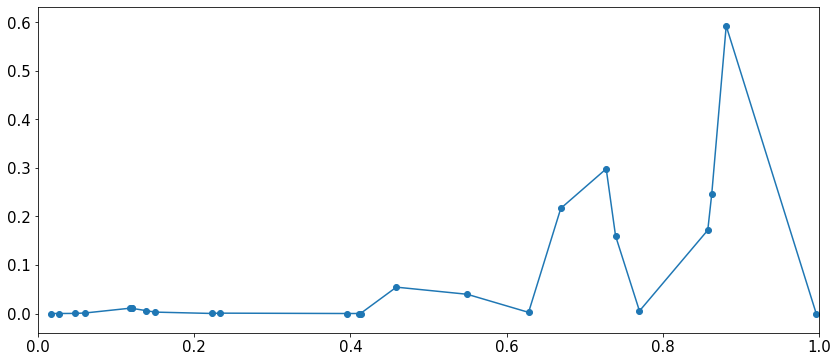

<IPython.core.display.Javascript object>

In [426]:
X_initial_search_space = np.sort(np.random.rand(25))
y_initial_search_space = objective(X_initial_search_space)

plt.scatter(X_initial_search_space, y_initial_search_space)
plt.plot(X_initial_search_space, y_initial_search_space)
plt.xlim([0, 1])
plt.show()

In [427]:
gp = GaussianProcessRegressor(kernel=RBF(length_scale=0.1), alpha=0.01)
gp.fit(X_initial_search_space.reshape(-1, 1), y_initial_search_space)

GaussianProcessRegressor(alpha=0.01, copy_X_train=True,
                         kernel=RBF(length_scale=0.1), n_restarts_optimizer=0,
                         normalize_y=False, optimizer='fmin_l_bfgs_b',
                         random_state=None)

<IPython.core.display.Javascript object>

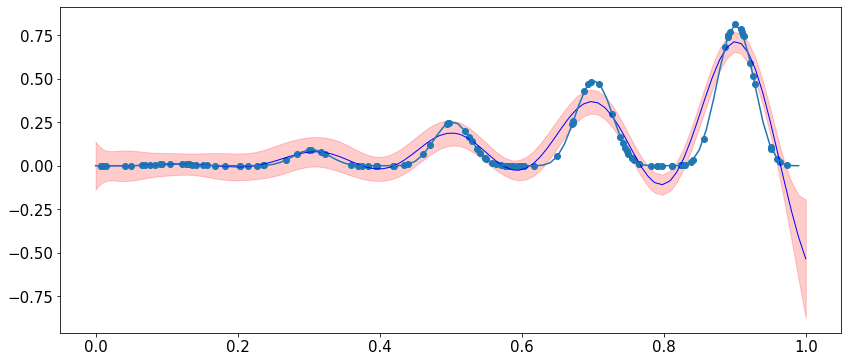

135


<IPython.core.display.Javascript object>

In [423]:
# define the mode



X_ = np.linspace(start=0, stop=1, num=100)
X_ = np.sort(np.append(X_, y_initial_search_space))
y_pred_mean, y_pred_std = gp.predict(X_.reshape(-1, 1), return_std=True)


plt.plot(X_, y_pred_mean, "b", lw=1)
plt.fill_between(
    X_,
    y_pred_mean - 2 * y_pred_std,
    y_pred_mean + 2 * y_pred_std,
    alpha=0.2,
    color="r",
)


plt.plot(X, y)
plt.scatter(X_initial_search_space, y_initial_search_space)
plt.show()


X_initial_search_space = np.append(X_initial_search_space, np.random.rand(10))
y_initial_search_space = objective(X_initial_search_space)
print(len(y_initial_search_space))

In [ ]:
Three common examples include:

Probability of Improvement (PI).
Expected Improvement (EI).
Lower Confidence Bound (LCB).

In [454]:
# probability of improvement acquisition function
def acquisition(X, Xsamples, model):
    # calculate the best surrogate score found so far
    yhat, _ = model.predict(X.reshape(-1, 1), return_std=True)
    best = np.max(yhat)
    # calculate mean and stdev via surrogate function
    mu, std = model.predict(Xsamples.reshape(-1, 1), return_std=True)
    #     mu = mu[:, 0]
    # calculate the probability of improvement
    probs = stats.norm.cdf((mu - best) / (std + 1e-9))
    return mu, probs

<IPython.core.display.Javascript object>

In [455]:
# http://krasserm.github.io/2018/03/21/bayesian-optimization/

<IPython.core.display.Javascript object>

In [456]:
a, b = acquisition(X_, X_initial_search_space, gp)

<IPython.core.display.Javascript object>

In [457]:
a

array([-0.02659953, -0.02408243, -0.01943762, -0.01629979, -0.00233234,
       -0.00179346, -0.00175452,  0.00267989,  0.00532416,  0.02305216,
        0.02546669,  0.0655086 ,  0.06932098,  0.06975106,  0.08108658,
        0.10353772,  0.1230151 ,  0.13324805,  0.14766346,  0.15063124,
        0.1582128 ,  0.17983763,  0.18110075,  0.18565809,  0.21398455])

<IPython.core.display.Javascript object>

In [452]:
len(X_initial_search_space)

25

<IPython.core.display.Javascript object>